In [2]:
import math

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
def unif_sum_samples(n):
    samples = []
    for i in range(n):
        unif_samples = np.random.uniform(0, 1, 12)
        samples.append(np.sum(unif_samples) - 6)
    return samples

In [6]:
my_unif_sum_samples = unif_sum_samples(100000)

In [7]:
unif_sum = np.random.normal(0, 1, 100000)

(array([3.000e+00, 6.000e+00, 1.100e+01, 1.900e+01, 3.200e+01, 4.700e+01,
        1.000e+02, 1.470e+02, 2.550e+02, 3.560e+02, 4.870e+02, 8.080e+02,
        1.054e+03, 1.481e+03, 1.792e+03, 2.330e+03, 2.925e+03, 3.437e+03,
        4.121e+03, 4.722e+03, 5.279e+03, 5.678e+03, 6.050e+03, 6.253e+03,
        6.377e+03, 6.263e+03, 5.949e+03, 5.633e+03, 5.020e+03, 4.621e+03,
        4.038e+03, 3.369e+03, 2.764e+03, 2.190e+03, 1.805e+03, 1.430e+03,
        1.029e+03, 7.030e+02, 5.290e+02, 3.200e+02, 2.270e+02, 1.530e+02,
        7.300e+01, 5.400e+01, 3.200e+01, 1.200e+01, 8.000e+00, 6.000e+00,
        1.000e+00, 1.000e+00]),
 array([-3.91521515, -3.75479987, -3.5943846 , -3.43396932, -3.27355405,
        -3.11313877, -2.9527235 , -2.79230822, -2.63189295, -2.47147767,
        -2.3110624 , -2.15064712, -1.99023185, -1.82981657, -1.6694013 ,
        -1.50898603, -1.34857075, -1.18815548, -1.0277402 , -0.86732493,
        -0.70690965, -0.54649438, -0.3860791 , -0.22566383, -0.06524855,
         0.

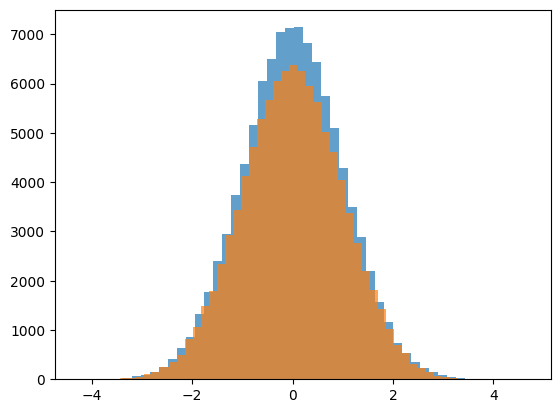

In [8]:
plt.hist(unif_sum, bins = 50, alpha = 0.7)
plt.hist(my_unif_sum_samples, bins = 50, alpha = 0.7)

In [10]:
from scipy.stats import norm

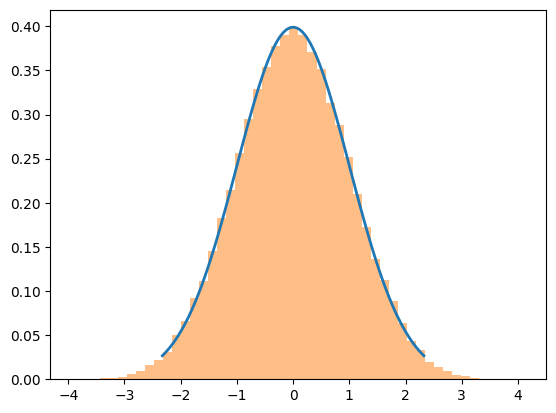

In [11]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), lw=2)
ax.hist(my_unif_sum_samples, bins=50, alpha=0.5, density = True)
plt.show()

In [12]:
def exp_samples(n, l):
    samples = []
    for i in range(n):
        unif = np.random.uniform(0, 1)
        samples.append(-math.log(unif)/l)
    return samples

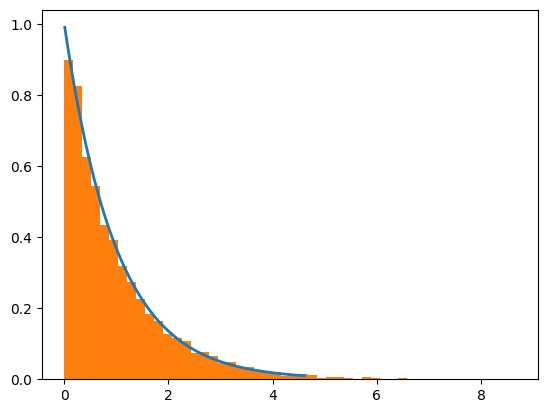

In [13]:
from scipy.stats import expon
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x), lw=2)
ax.hist(exp_samples(10000, 1), density = True, bins = 50)
plt.show()

In [14]:
def weibull(n, beta, alpha = 1):
    unifs = np.random.uniform(0, 1, n)
    weibs = alpha*(-np.log(unifs))**(1/beta)
    return list(weibs)

In [15]:
beta = 10

In [16]:
my_weibs = weibull(10000, beta)

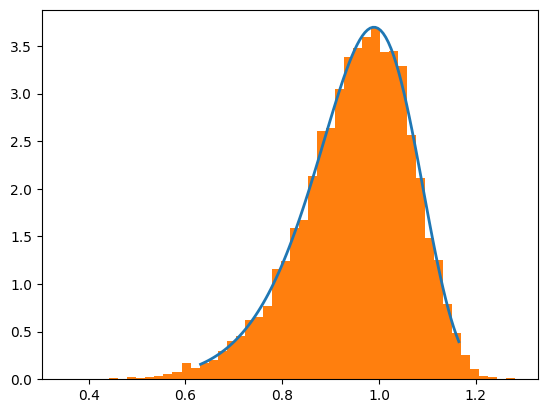

In [17]:
from scipy.stats import weibull_min
fig, ax = plt.subplots(1, 1)
x = np.linspace(weibull_min.ppf(0.01, beta), weibull_min.ppf(0.99, beta), 100)
ax.plot(x, weibull_min.pdf(x, beta), lw=2)
ax.hist(my_weibs, density = True, bins = 50)
plt.show()

In [18]:
def circle_samples(n, power=1):
    r_unifs = np.random.uniform(0, 1, n)
    theta_unifs = np.random.uniform(-np.pi, np.pi, n)
    samples_x = (r_unifs**power)*np.cos(theta_unifs)
    samples_y = (r_unifs**power)*np.sin(theta_unifs)
    return samples_x, samples_y

In [19]:
x_1, x_2 = circle_samples(10000, 0.5)

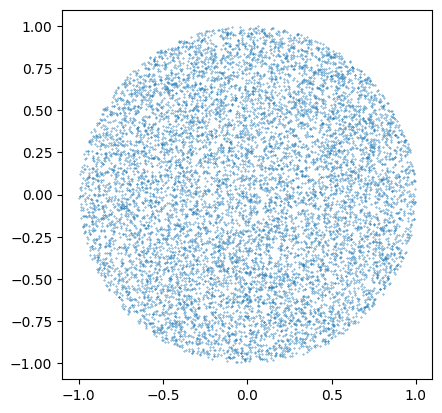

In [20]:
plt.scatter(x_1, x_2, s = 0.1)
plt.gca().set_aspect('equal')